# 03 王牌例子 MNIST

CNN 的創始者 Yann LeCun 第一個 CNN 例子就是用來辨識手寫、印刷的 0-9 數字。這裡用 LeCun 原版資料:

[MNIST 手寫辨識資料](http://yann.lecun.com/exdb/mnist/)

每個手寫圖檔都是 28x28 大小的, 輸出原本是 0-9 的數字, 但我們想改成辨視資料是 0 就要輸出

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

是 3 就是

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

等等。

另外我們用最傳統的 Fully Connected Feedforward 架構, 而不是用 CNN:

* 輸入是一個 28x28=784 維的向量。
* 輸出是 10 維向量 (每個數字都是 0 到 9)
* Hidden Layer 有兩層, 每層 500 個 neuron

## 1. 套件

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

Using Theano backend.


其中的 `keras` 是我們選用非常方便的 deep learning 套件, 它甚至幫我們準備好了 MNIST 等這類有名的資料庫。

## 2. 讀入 MNIST 資料

In [2]:
(x0_train, y0_train), (x0_test, y0_test) = mnist.load_data()

最親切的是它還分好訓練資料和測試資料, 我們來看看各有多少筆資料。

In [3]:
print("訓練資料筆數: ", len(x0_train))
print("測試資料筆數: ", len(x0_test))

訓練資料筆數:  60000
測試資料筆數:  10000


## 3. 看看資料內容

我們來看看資料的內容長什麼樣子。

In [4]:
ind = 777
X = x0_train[ind]

In [5]:
X

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  10,  59, 156, 239, 254, 254, 254, 255, 246, 109,   0,   0,
          0,   0],
       [  

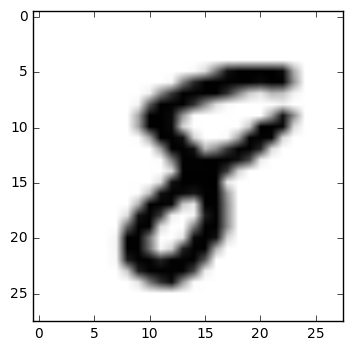

In [6]:
plt.imshow(X, cmap='Greys')

如果堅持不要外框。

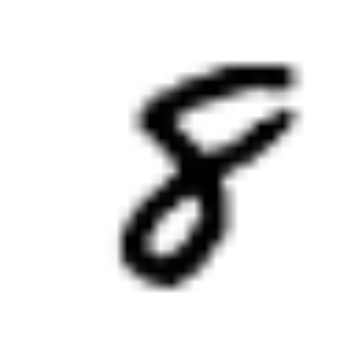

In [7]:
fig, ax = plt.subplots()
ax.set_axis_off()
plt.imshow(X, cmap='Greys')

看一下「正確答案」。

In [8]:
y0_train[ind]

8

## 4. 互動展示 (複習)

In [9]:
from ipywidgets import interact

In [10]:
def show(ind):
    print("數字: ", y0_train[ind])
    fig, ax = plt.subplots()
    ax.set_axis_off()
    plt.imshow(x0_train[ind], cmap='Greys')

數字:  7


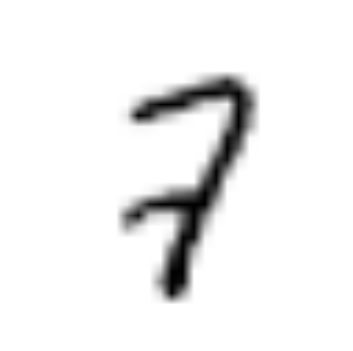

In [11]:
interact(show, ind=(0,59999))

## 5. 資料整理之一

現在每個訓練資料都是 28x28 的矩陣, 但我們常常都是「拉平」的向量, 也就是每筆輸入可能是 784 (=28x28) 的向量。

In [12]:
x_train = x0_train.reshape(60000, 28*28)

In [13]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

#### [練習] 把 `x0_test` 也改成「平的」向量

## 6. 資料整理之二

輸出原本是 0-9 的數字, 但我們想改成辨視資料是 0 就要輸出

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

是 3 就是

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

等等。

In [14]:
y0_train[0]

5

In [15]:
from keras.utils import np_utils

In [16]:
y_train = np_utils.to_categorical(y0_train,10)

In [17]:
y_train[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [18]:
ind = 10
print("改變前: ", y0_train[ind])
print("改變後: ", y_train[ind])

改變前:  3
改變後:  [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


#### [練習] 把 `y0_test` 也修改過來